# About 

This notebook generates the tables/plots for causative and exploratory attacks against intrusion detection systems. 

In [8]:
import pickle
import numpy as np 
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pylab as plt
plt.style.use('seaborn')

## Define Functions for the Notebook 

In [15]:
def plot_exploratory_results(fname:str=None):
    d = pickle.load(open(fname, 'rb'))

    STATS = ['accs', 'mccs']
    LABELS = ['Accuracy', 'MCC']
    METHOD = ['if', 'svm', 'ee', 'lo']
    x_labels = ['IF', 'SVM', 'EE', 'LO']

    for stat, lab_name in zip(STATS, LABELS): 
        # build gs
        g1, g2, g3, g4, g5 = [], [], [], [], []
        for method in METHOD: 
            g1.append(d[''.join([stat, '_', method, '_baseline'])])
            g2.append(d[''.join([stat, '_', method, '_deepfool'])])
            g3.append(d[''.join([stat, '_', method, '_pgd'])])
            g4.append(d[''.join([stat, '_', method, '_fgsm'])])
            g5.append(d[''.join([stat, '_', method, '_dt'])])
        
    
        x = np.arange(len(x_labels))  # the label locations
        width = 0.15  # the width of the bars
    
        plt.figure()
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - 2*width, g1, width, label='Baseline')
        rects2 = ax.bar(x - 1*width, g2, width, label='Deepfool')
        rects3 = ax.bar(x + 0*width, g3, width, label='PGD')
        rects4 = ax.bar(x + 1*width, g4, width, label='FGSM')
        rects5 = ax.bar(x + 2*width, g5, width, label='DT')

        ax.set_ylabel(lab_name)
        ax.set_xticks(x)
        ax.set_xticklabels(x_labels)
        ax.legend()
        fig.tight_layout()
        plt.savefig(''.join([fname[:-4], '_', stat, '.pdf']) )
        plt.close()
    return None 

In [17]:
def plot_causative_results(fname:str=None): 
    d = pickle.load(open(fname, 'rb'))
    
    STATS = ['accs', 'mccs']
    LABELS = ['Accuracy', 'MCC']
    METHOD = ['if', 'svm', 'ee', 'lo']
    x_labels = ['IF', 'SVM', 'EE', 'LO']
    
    for stat, lab_name in zip(STATS, LABELS): 
        # build gs
        g1, g2, g3, g4, g5 = [], [], [], [], []
        for method in METHOD: 
            g1.append(d[''.join([stat, '_', method, '_baseline'])])
            g2.append(d[''.join([stat, '_', method, '_pattern'])])
            g3.append(d[''.join([stat, '_', method, '_single'])])
            g4.append(d[''.join([stat, '_', method, '_svc'])])
        
        x = np.arange(len(x_labels))  # the label locations
        width = 0.15  # the width of the bars
    
        plt.figure()
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - 2*width, g1, width, label='Baseline')
        rects2 = ax.bar(x - 1*width, g2, width, label='BD-Pattern')
        rects3 = ax.bar(x + 0*width, g3, width, label='BD-Single')
        rects4 = ax.bar(x + 1*width, g4, width, label='SVC')
    
        ax.set_ylabel(lab_name)
        ax.set_xticks(x)
        ax.set_xticklabels(x_labels)
        ax.legend()
        fig.tight_layout()
        plt.savefig(''.join([fname[:-4], '_', stat, '.pdf']) )
        plt.close()
    return None 

# Exploratory Attacks 

In [16]:
plot_exploratory_results(fname='outputs/results_ids_attacks_all_nslkdd.pkl')
plot_exploratory_results(fname='outputs/results_ids_attacks_only_nslkdd.pkl')

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

# Causative Attacks

In [18]:
plot_causative_results(fname='outputs/results_ids_causative_nslkdd_pp5.pkl')
plot_causative_results(fname='outputs/results_ids_causative_nslkdd_pp10.pkl')
plot_causative_results(fname='outputs/results_ids_causative_nslkdd_pp15.pkl')

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

In [2]:
dataset = 'nslkdd'

data = np.load(''.join(['data/causative/full_data_', dataset, '_cleanlabel_pattern.npz']), allow_pickle=True)
X_tr, y_tr, X_te, y_te, X_adv_pattern, y_adv_pattern  = data['Xtr'], data['ytr'], data['Xte'], data['yte'], data['Xaml'], np.argmax(data['yaml'], axis=1) 
    
data = np.load(''.join(['data/causative/full_data_', dataset, '_cleanlabel_single.npz']), allow_pickle=True)
X_adv_single, y_adv_single = data['Xaml'], np.argmax(data['yaml'], axis=1) 
    
data = np.load(''.join(['data/causative/full_data_', dataset, '_svc.npz']), allow_pickle=True)
X_adv_svc, y_adv_svc = data['Xaml'], np.argmax(data['yaml'], axis=1) 


In [18]:
N = 500 
N1 = np.random.randint(0, len(X_tr), N)
N2 = np.random.randint(0, len(X_adv_pattern), N)
N3 = np.random.randint(0, len(X_adv_single), N)
N4 = np.random.randint(0, len(X_adv_svc), N)
X = np.vstack((X_tr[N1], 
               X_adv_pattern[N2], 
               X_adv_single[N3], 
               X_adv_svc[N4]))
X_embedded = TSNE(n_components=2).fit_transform(X)

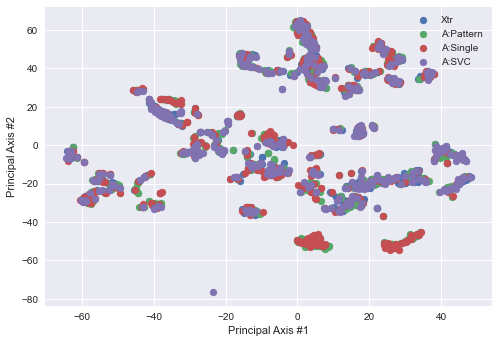

In [41]:
# plot everything with no labels 
plt.figure()
plt.scatter(X_embedded[:N, 0], X_embedded[:N, 1], label='Xtr')
plt.scatter(X_embedded[N:2*N, 0], X_embedded[N:2*N, 1], label='A:Pattern')
plt.scatter(X_embedded[2*N:3*N, 0], X_embedded[2*N:3*N, 1], label='A:Single')
plt.scatter(X_embedded[3*N:, 0], X_embedded[3*N:, 1], label='A:SVC')
plt.xlabel('Principal Axis #1')
plt.ylabel('Principal Axis #2')
plt.legend()
plt.savefig('outputs/tsne_all_data_all_attacks_nolabel.pdf') 

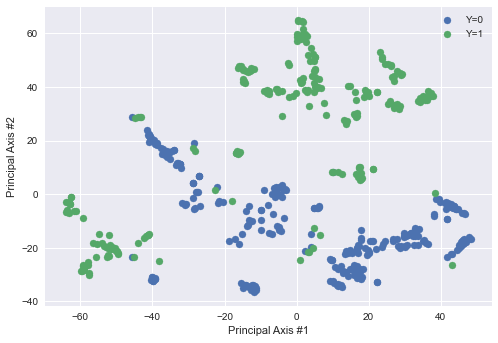

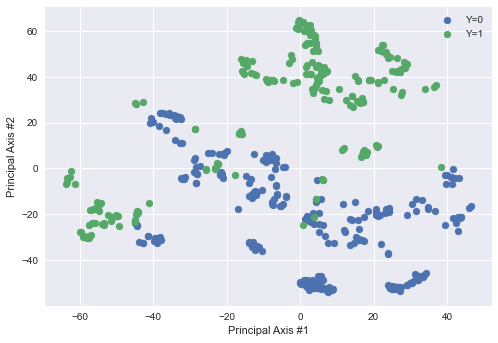

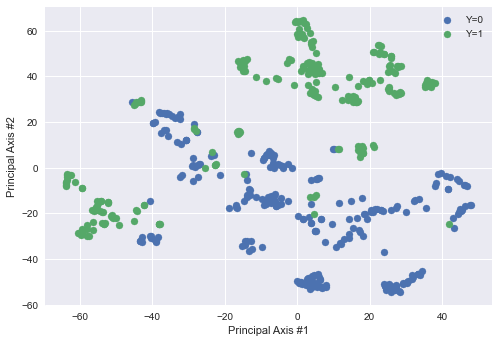

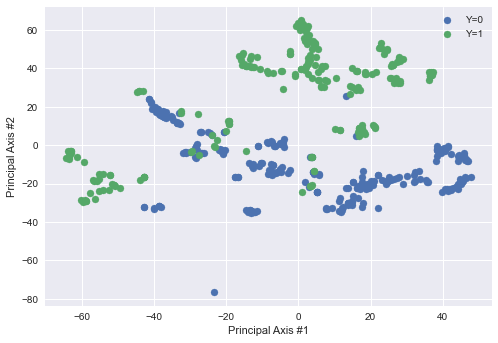

In [43]:
# plot normal data 
Xp = X_embedded[:N]
yl = y_tr[N1]
plt.figure()
plt.scatter(Xp[yl==0, 0], Xp[yl==0, 1], label='Y=0')
plt.scatter(Xp[yl==1, 0], Xp[yl==1, 1], label='Y=1')
plt.xlabel('Principal Axis #1')
plt.ylabel('Principal Axis #2')
plt.legend()
plt.savefig('outputs/tsne_train_data_no_attacks_label.pdf') 

# plot pattern data 
Xp = X_embedded[N:2*N]
yl = y_adv_pattern[N2]
plt.figure()
plt.scatter(Xp[yl==0, 0], Xp[yl==0, 1], label='Y=0')
plt.scatter(Xp[yl==1, 0], Xp[yl==1, 1], label='Y=1')
plt.xlabel('Principal Axis #1')
plt.ylabel('Principal Axis #2')
plt.legend()
plt.savefig('outputs/tsne_train_data_pattern_attacks_label.pdf') 


# plot pattern data 
Xp = X_embedded[2*N:3*N]
yl = y_adv_pattern[N3]
plt.figure()
plt.scatter(Xp[yl==0, 0], Xp[yl==0, 1], label='Y=0')
plt.scatter(Xp[yl==1, 0], Xp[yl==1, 1], label='Y=1')
plt.xlabel('Principal Axis #1')
plt.ylabel('Principal Axis #2')
plt.legend()
plt.savefig('outputs/tsne_train_data_single_attacks_label.pdf') 



# plot svc data 
Xp = X_embedded[3*N:]
yl = y_adv_svc[N4]
plt.figure()
plt.scatter(Xp[yl==0, 0], Xp[yl==0, 1], label='Y=0')
plt.scatter(Xp[yl==1, 0], Xp[yl==1, 1], label='Y=1')
plt.xlabel('Principal Axis #1')
plt.ylabel('Principal Axis #2')
plt.legend()
plt.savefig('outputs/tsne_train_data_svc_attacks_label.pdf') 

In [37]:
len(y_adv_svc)

18895

In [39]:
len(X_embedded)

2000

In [40]:
4*N

2000